# 2D visualization example

* [The widgets can be seen at mybinder.org by clicking here](https://mybinder.org/v2/gh/tlinnet/mybinder_relax/master?filepath=nmrglue_s4_2d_plotting.ipynb)

## Introduction
This example is taken from Listing S4 from the 2013 JBNMR nmrglue paper. In this example a 2D SSNMR spectrum is visualized. 

* [Link to origin here.](https://github.com/jjhelmus/nmrglue/tree/master/examples/jbnmr_examples/s4_2d_plotting)
* [Modified with inspiration from here](https://github.com/jjhelmus/nmrglue/blob/master/examples/interactive/interactive_2d/2d_interactive.py)

In [1]:
# Get data
import os, os.path
ng_dir = 'nmrglue_data/s4_2d_plotting'
if not os.path.exists(ng_dir):
    print("No %s. Downloading."%ng_dir)
    import urllib.request, zipfile
    zipf = 'jbnmr_s4_2d_plotting.zip'
    urllib.request.urlretrieve('https://storage.googleapis.com/google-code-archive-downloads/v2/code.google.com/nmrglue/%s'%zipf, zipf)
    with zipfile.ZipFile(zipf,"r") as zip_ref:
        zip_ref.extractall("nmrglue_data")
    os.remove(zipf)
# Specify data
ng_dat = 'nmrglue_data/s4_2d_plotting/test.ft2'

## With matplotlib

<IPython.core.display.Javascript object>


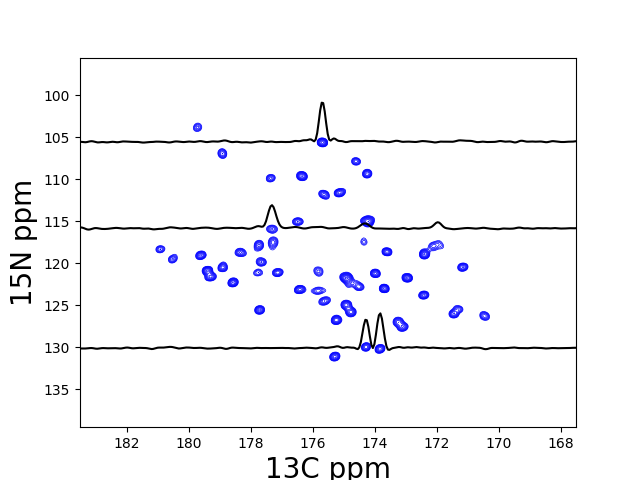

(139.5, 95.5)

In [2]:
import numpy as np
import nmrglue as ng
# Plotting. Set backend. This must be done before importing.
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.cm

# read in data
ng_dic, ng_data = ng.pipe.read(ng_dat)

# find PPM limits along each axis
uc_15n = ng.pipe.make_uc(ng_dic, ng_data, 0)
uc_13c = ng.pipe.make_uc(ng_dic, ng_data, 1)
x0, x1 = uc_13c.ppm_limits()
y0, y1 = uc_15n.ppm_limits()

cmap = matplotlib.cm.Blues_r    # contour map (colors to use for contours)
contour_start =  8.5e4          # contour level start value
contour_num = 20                # number of contour levels
contour_factor = 1.20           # scaling factor between contour levels
# calculate contour levels
cl = [contour_start * contour_factor ** x for x in range(contour_num)]

# plot the spectrum
#fig = plt.figure(figsize=(10, 10))
fig = plt.figure()
ax = fig.add_subplot(111)
# Plot
ax.contour(ng_data, cl, colors='blue', extent=(x0, x1, y0, y1), linewidths=0.5)

# add 1D slices
x = uc_13c.ppm_scale()
s1 = ng_data[uc_15n("105.52ppm"), :]
s2 = ng_data[uc_15n("115.85ppm"), :]
s3 = ng_data[uc_15n("130.07ppm"), :]
ax.plot(x, -s1 / 8e4 + 105.52, 'k-')
ax.plot(x, -s2 / 8e4 + 115.85, 'k-')
ax.plot(x, -s3 / 8e4 + 130.07, 'k-')

# label the axis and save
ax.set_xlabel("13C ppm", size=20)
ax.set_xlim(183.5, 167.5)
ax.set_ylabel("15N ppm", size=20)
ax.set_ylim(139.5, 95.5)

## With plotly

In [3]:
import plotly.graph_objs as go
p_online = False
if p_online:
    import plotly.plotly as py
    # Set credential
    import plotly.tools
    plotly.tools.set_credentials_file(username='DemoAccount', api_key='lr1c37zw81')
else:
    import plotly.offline as py
    py.init_notebook_mode(connected=True)

In [4]:
np_z=[[10, 10.625, 12.5, 15.625, 20],
           [5.625, 6.25, 8.125, 11.25, 15.625],
           [2.5, 3.125, 5., 8.125, 12.5],
           [0.625, 1.25, 3.125, 6.25, 10.625],
           [0, 0.625, 2.5, 5.625, 10]]
np_z = np.asarray(np_z)
print(np_z.shape)
print(ng_data.shape)
print(cl)

(5, 5)
(2048, 8192)
[85000.0, 102000.0, 122400.0, 146879.99999999997, 176256.0, 211507.19999999995, 253808.63999999993, 304570.3679999999, 365484.44159999985, 438581.3299199999, 526297.5959039998, 631557.1150847997, 757868.5381017596, 909442.2457221115, 1091330.6948665339, 1309596.8338398405, 1571516.2006078085, 1885819.44072937, 2262983.328875244, 2715579.994650293]


In [5]:
data = [
    go.Contour(
            #z=ng_data,
            z=np_z,
            colorscale='Jet',
            contours=dict(
                coloring='lines',
            ),
    )
]

# To slow for large datasets
py.iplot(data)

## With bokeh

In [6]:
import bokeh